In [1]:
import re
import scipy
from numpy import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense

from sklearn.svm import LinearSVC
from sklearn import preprocessing,svm
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss, precision_recall_fscore_support

### Read Files

In [2]:
train_df=pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
test_df=pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')

In [3]:
train_df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [4]:
test_df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,DoS,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,DDoS,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,DDoS,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,DoS,TCP


### Preprocessing

In [5]:
main_df=pd.concat([train_df,test_df])

In [6]:
main_df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,DoS,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,DDoS,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,DDoS,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,DoS,TCP


In [7]:
main_df.columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [8]:
ndf=main_df[['seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max','attack', 'category']]

In [9]:
# ndf['category']=ndf['category'].astype('category')


In [10]:
# ndf.dtypes

### Extract Features and Class

In [11]:
X=ndf.iloc[:,:-2]
y=ndf.iloc[:,-1]

### scaling

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
LabelEncoder()
print(list(le.classes_))
y = le.transform(y)
print(y)

['DDoS', 'DoS', 'Normal', 'Reconnaissance', 'Theft']
[0 0 0 ... 0 1 0]


### train_test_split

In [14]:
import sklearn

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Model

In [15]:

# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=10, activation='tanh'))
model.add(Dense(60, input_dim=20, activation='tanh'))
model.add(Dense(80, input_dim=60, activation='tanh'))
model.add(Dense(90, input_dim=80, activation='tanh'))
model.add(Dense(5, input_dim=90, activation='softmax'))
# model.add(Dense(80, input_dim=60, activation='relu'))
# model.add(Dense(80, input_dim=60, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                1260      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                4880      
_________________________________________________________________
dense_3 (Dense)              (None, 90)                7290      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 455       
Total params: 14,105
Trainable params: 14,105
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=256)

Epoch 1/10
11465/11465 [==============================] - 13s 1ms/step - loss: 0.2613 - accuracy: 0.8888 - val_loss: 0.1061 - val_accuracy: 0.9588
Epoch 2/10
11465/11465 [==============================] - 13s 1ms/step - loss: 0.0939 - accuracy: 0.9607 - val_loss: 0.0680 - val_accuracy: 0.9708
Epoch 3/10
11465/11465 [==============================] - 13s 1ms/step - loss: 0.0728 - accuracy: 0.9682 - val_loss: 0.0668 - val_accuracy: 0.9716
Epoch 4/10
11465/11465 [==============================] - 12s 1ms/step - loss: 0.0648 - accuracy: 0.9712 - val_loss: 0.0626 - val_accuracy: 0.9720
Epoch 5/10
11465/11465 [==============================] - 13s 1ms/step - loss: 0.0601 - accuracy: 0.9727 - val_loss: 0.0574 - val_accuracy: 0.9728
Epoch 6/10
11465/11465 [==============================] - 13s 1ms/step - loss: 0.0559 - accuracy: 0.9743 - val_loss: 0.0499 - val_accuracy: 0.9762
Epoch 7/10
11465/11465 [==============================] - 13s 1ms/step - loss: 0.0533 - accuracy: 0.9754 - val_loss: 0

In [19]:
# model.fit(X, y,  epochs=10, batch_size=10)

### plotting

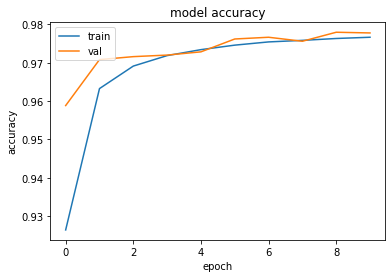

In [24]:
import keras
from matplotlib import pyplot as plt
# history = model.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

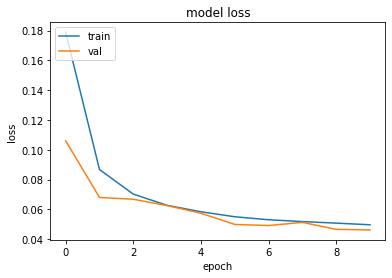

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=c))